Sample code for AIRI400 Perceptron class. The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

In [1]:
import numpy as np
import pandas as pd
import os
from urllib.request import urlopen

IRIS_DATA = "iris.dat"
if not os.path.exists(IRIS_DATA):
    raw = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').read()
    with open(IRIS_DATA, "wb") as f:
        f.write(raw)

In [4]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

cost_log = []

In [3]:
df = pd.read_csv(IRIS_DATA, header=None)

In [26]:
def AGD_train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    global cost_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []
    cost_log = []

    for i in range(epochs):
        output = net_input(X)
        errors = (y - output)
        print("Epoch {:3d}\nOUTPUT\n{}\nERRORS\n{}".format(i, output, errors))
        weights[1:] += eta * X.T.dot(errors)
        weights[0] += eta * errors.sum()
        print("Updated WEIGHTS\n{}".format(weights))
        cost = (errors**2).sum() / 2.0
        cost_log.append(cost)
    return

In [9]:
def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def AGD_activation(X):
    return net_input(X)

def AGD_predict(X):
    return np.where(AGD_activation(X) >= 0.0, 1, -1)

In [7]:
# setosa and versicolor
y = np.asarray(df.iloc[0:100, 4].values)
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = np.asarray(df.iloc[0:100, [0,2]].values)

In [27]:
ada = AGD_train(X, y, epochs=10, eta=0.01)

Initial weights [ 0.  0.  0.]
Epoch   0
OUTPUT
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ERRORS
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Updated WEIGHTS
[ 0.     0.465  1.398]
Epoch   1
OUTPUT
[  4.3287   4.2357   4.0029   4.236    4.2822   4.8876   4.0962   4.422
   4

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

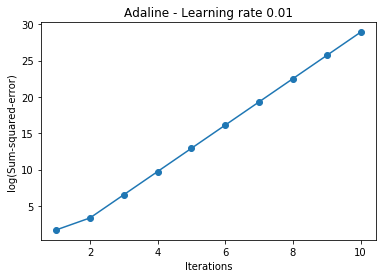

In [30]:
plt.plot(range(1, len(cost_log)+1), np.log10(cost_log), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

In [31]:
ada = AGD_train(X, y, epochs=10, eta=0.0001)

Initial weights [ 0.  0.  0.]
Epoch   0
OUTPUT
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ERRORS
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Updated WEIGHTS
[ 0.       0.00465  0.01398]
Epoch   1
OUTPUT
[ 0.043287  0.042357  0.040029  0.04236   0.042822  0.048876  0.040962

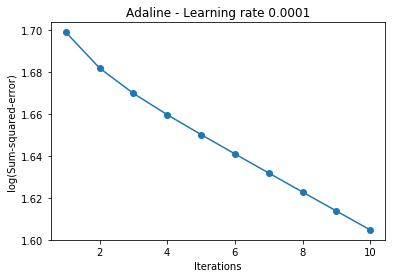

In [32]:
plt.plot(range(1, len(cost_log)+1), np.log10(cost_log), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

# Linear activation on X2, y2 from Ex03

In [33]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

In [34]:
ada = AGD_train(X2, y2, epochs=100, eta=0.001)

Initial weights [ 0.  0.  0.]
Epoch   0
OUTPUT
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ERRORS
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Updated WEIGHTS
[ 0.     -0.0102 -0.035 ]
Epoch   1
OUTPUT
[-0.08164 -0.08514 -0.08412 -0.06896 -0.08106 -0.07406 -0.08966 -0.05948


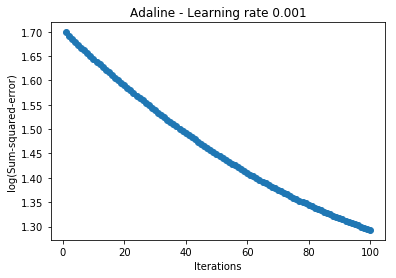

In [35]:
plt.plot(range(1, len(cost_log)+1), np.log10(cost_log), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.001')
plt.show()

In [36]:
pos = X2[[y2 == 1]]
neg = X2[[y2 == -1]]

In [37]:
min_x = min(X2[:,0])
max_x = max(X2[:,0])
print(min_x, max_x)

2.0 3.8


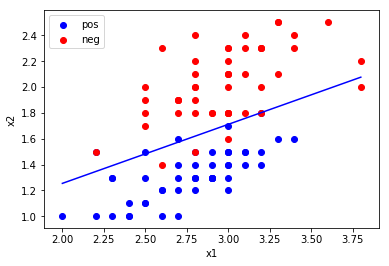

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

point_x = np.array([min_x, max_x])
point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

In [40]:
print(cost_log)

[50.0, 49.072098206, 48.396863737762267, 47.74633010627344, 47.108849753991556, 46.483612463809585, 45.870355093991719, 45.268846174903395, 44.678860016330908, 44.100175330263077, 43.532575082914263, 42.975846409823738, 42.429780535602241, 41.894172695371445, 41.368822057720081, 40.853531649140528, 40.348108279917014, 39.852362471437566, 39.366108384902269, 38.889163751401199, 38.42134980333541, 37.962491207155502, 37.512415997392289, 37.070955511954686, 36.637944328670656, 36.213220203047172, 35.796624007225859, 35.387999670111263, 34.987194118649505, 34.594057220234674, 34.208441726221828, 33.830203216525121, 33.459200045280227, 33.095293287550476, 32.738346687056961, 32.388226604912774, 32.044801969341876, 31.707944226364138, 31.377527291427601, 31.053427501969921, 30.735523570891189, 30.423696540920503, 30.117829739859154, 29.81780873668372, 29.523521298492323, 29.234857348278044, 28.951708923513479, 28.673970135530915, 28.401537129682907, 28.134308046268057, 27.872182982207537, 27

In [42]:
print('Total number of misclassifications: %d of 100' % (y2 != AGD_predict(X2)).sum())

Total number of misclassifications: 8 of 100
